In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
from matplotlib import font_manager, rc 
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'NanumBarunGothic'

In [132]:
uci = pd.read_csv('uci-secom.csv')

In [133]:
#참고할만한 사이트
## https://www.kaggle.com/code/emphymachine/solution-day1-assignment-semiconductor-dataset 수율, 상관관계 분석
# https://www.kaggle.com/code/ryokusnadi/semiconductor-project-yield-prediction 
# pie차트, bar 차트
#실패(Pass_Fail=1)가 8월에 최고조에 달하는 것을 볼 수 있으며 이는 합격 최고점이기도 합니다.
#8월과 9월은 제품이 가장 많고 고장도 가장 많이 나는 달입니다.
#실패는 9월부터 약간의 수정 후 수그러들 것으로 보입니다.
#(5~8월은 합격보다 불합격이 더 많음)

#전처리랑 시각화를 다 못했어요 ...결측치와 중복열삭제만 했어요

In [134]:
uci.head(5)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [135]:
uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [136]:
uci.isnull()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1563,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1564,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [137]:
uci.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [138]:
uci.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [139]:
print(uci.dtypes)

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object


In [140]:
uci.count()

Time         1567
0            1561
1            1560
2            1553
3            1553
             ... 
586          1566
587          1566
588          1566
589          1566
Pass/Fail    1567
Length: 592, dtype: int64

In [141]:
uci.fillna('0')

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.0,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,0,0.5005,0.0118,0.0035,2.363,0,0,0,0,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.006,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.9,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.499,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.52,1.5334,100.0,100.3967,0.1235,1.5031,...,0,0.48,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.172,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.172,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,0,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.172,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3,1110.4967,0.8236,100.0,99.4122,0.1208,0,...,43.5231,0.4987,0.0153,0.0041,3.059,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [142]:
uci.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [143]:
uci2 = uci.copy()

In [144]:
uci3 = uci2.drop('Time',axis=1)

In [145]:
uci3.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [146]:
uci3.T.duplicated()

0            False
1            False
2            False
3            False
4            False
             ...  
586          False
587          False
588          False
589          False
Pass/Fail    False
Length: 591, dtype: bool

In [147]:
#중복인 열 삭제(열이 전부 0인값 삭제)
uci3.T.drop_duplicates()

,0,1,2,3,4,5,6,7,8,9,...,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566
0,3030.9300,3095.7800,2932.6100,2988.7200,3032.2400,2946.2500,3030.2700,3058.8800,2967.6800,3016.1100,...,3072.1000,3012.3000,3076.3300,2770.4000,2951.1400,2899.4100,3052.3100,2978.8100,2894.9200,2944.9200
1,2564.0000,2465.1400,2559.9400,2479.9000,2502.8700,2432.8400,2430.1200,2690.1500,2600.4700,2428.3700,...,2534.8700,2466.8400,2456.1300,2549.4200,2326.5900,2464.3600,2522.5500,2379.7800,2532.0100,2450.7600
2,2187.7333,2230.4222,2186.4111,2199.0333,2233.3667,2233.3667,2230.4222,2248.9000,2248.9000,2248.9000,...,2177.4333,2217.4111,2217.4111,2204.2889,2212.6334,2179.7333,2198.5667,2206.3000,2177.0333,2195.4444
3,1411.1265,1463.6606,1698.0172,909.7926,1326.5200,1326.5200,1463.6606,1004.4692,1004.4692,1004.4692,...,2945.8855,1032.2836,1032.2836,2637.9989,1081.5662,3085.3781,1124.6595,1110.4967,1183.7287,2914.1792
4,1.3602,0.8294,1.5102,1.3204,1.5334,1.5334,0.8294,0.7884,0.7884,0.7884,...,1.3321,1.4802,1.4802,1.5549,1.0096,1.4843,0.8763,0.8236,1.5726,1.5978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,NaN,0.0096,0.0584,0.0202,0.0202,0.0342,0.0342,0.0204,0.0111,0.0212,...,0.0277,0.0097,0.0150,0.0105,0.0320,0.0068,0.0068,0.0197,0.0262,0.0117
587,NaN,0.0201,0.0484,0.0149,0.0149,0.0151,0.0151,0.0194,0.0124,0.0191,...,0.0074,0.0172,0.0176,0.0133,0.0148,0.0138,0.0138,0.0086,0.0245,0.0162
588,NaN,0.0060,0.0148,0.0044,0.0044,0.0052,0.0052,0.0063,0.0045,0.0073,...,0.0023,0.0054,0.0057,0.0042,0.0051,0.0047,0.0047,0.0025,0.0075,0.0045
589,NaN,208.2045,82.8602,73.8432,73.8432,44.0077,44.0077,95.0310,111.6525,90.2294,...,26.7330,176.6783,117.4564,127.3154,46.4573,203.1720,203.1720,43.5231,93.4941,137.7844


In [148]:
#중복인 열 삭제 적용
uci3 =uci3.loc[:, ~uci.T.duplicated()]

In [149]:
#적용이 안되어있음 #코드 앞에 uci3= 쓰니까 됨 
uci3

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [150]:
uci3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 487 entries, 0 to Pass/Fail
dtypes: float64(486), int64(1)
memory usage: 5.8 MB


In [151]:
uci3 =uci3.fillna('0')

In [152]:
uci3

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.0,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0,0.5005,0.0118,0.0035,2.363,0,0,0,0,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.006,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.9,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.499,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.52,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0,0.48,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.172,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.172,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.172,-1
1564,2978.81,2379.78,2206.3,1110.4967,0.8236,100.0,99.4122,0.1208,0,0,...,43.5231,0.4987,0.0153,0.0041,3.059,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [153]:
#결측치 삭제가 안됨 #됨
uci3.isnull().sum()

0            0
1            0
2            0
3            0
4            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 487, dtype: int64

In [154]:
uci3

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.0,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0,0.5005,0.0118,0.0035,2.363,0,0,0,0,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.006,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.9,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.499,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.52,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0,0.48,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.172,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.172,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.172,-1
1564,2978.81,2379.78,2206.3,1110.4967,0.8236,100.0,99.4122,0.1208,0,0,...,43.5231,0.4987,0.0153,0.0041,3.059,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


<Axes: >

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

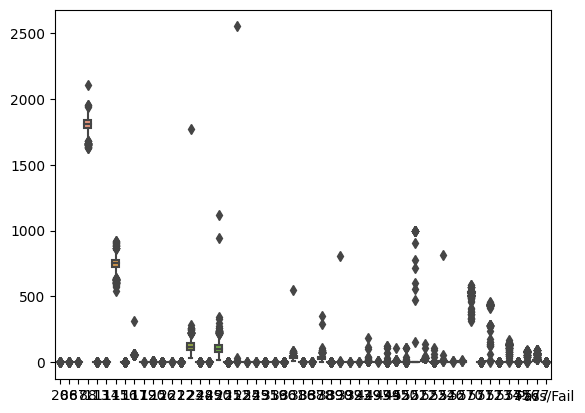

In [160]:
#이상치 구하기...
import seaborn as sns
sns.boxplot(data=uci3)